### Lifecycle dynamics for particular agent
The following code estimates the decisions of a household under a given solution -- that is under a particular calibration, for a given agent and for a particular price level. Below is the baseline calibration used -- for any other calibrations, the household variables can be changed and the code rerun. For any calibration changes, the price level should first be estimated in the Notebook "Full_estimation", and then updated below.

In [1]:
# Packages
from IPython.display import clear_output

from types import SimpleNamespace
import numpy as np
np.set_printoptions(suppress=True) # supresses scientific notation in numpy-arrays
from scipy import optimize
from scipy import interpolate
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
import warnings
from datetime import datetime

import one_run_model as model
%load_ext autoreload
%autoreload 2

### UNIT OF ACCOUNT IN THE MODEL IS MIO DKK
d = 1000000 # Converter from DKK to mDKK

In [2]:
# PARAMETERS
par = SimpleNamespace()
par.rent = 1200*10/d # rent per m2 per year
par.uc_value = 0.01*0.8*10 # user cost per house value in per
par.uc_sqm = 300*10/d # user cost per m2 per year
par.r = ((1+0.015)**(10)-1)*0.67 # interest rate for loans, over 10 years, with 30% effective interest rate tax deduction
par.rho = (1+0.005)**(10)-1 # interest for deposits, over 10 years
par.LTI = 4/10/0.6 # 4 x yearly pre-tax income (10 years per period, tax of 40%)
par.LTV = .95 # 5% down payment rate
par.phi = 200000/d # Limit of uncollaterized loan

# Endogenous parameter (fixed for partial analysis)
par.p = 48000/d # owner price per sqm

# HOUSEHOLDS
hh_baseline = SimpleNamespace()
hh_baseline.wage_path = [1.5,2.5,3.5,2.5,1.5]
hh_baseline.theta = [1.3,1.3,1.3,1.3,0.9] # Utility boost from owning
hh_baseline.alpha = 0.7 # Share of consumption in contemporanous utility 
hh_baseline.eta = 1.5 # CRRA utility function parameter
hh_baseline.chi = 0.2 # Strength of bequest motive
hh_baseline.beta = 0.98**10 # discounting over 10 years

In [3]:
warnings.filterwarnings("ignore") # See note below

starttime = datetime.now()
u,c,h,s,wplus,own,LTV,LTI = model.estimate(par,hh_baseline)
print("Done in",datetime.now()-starttime)

###################################################
# Note - the above will throw a few warnings. 
# To the best of my knowledge, it is a non-issue,
# as it happens in the optimization process, and
# the optimizer simply don't choose those solutions
# (And in case 1D optimization fails, there's a
# 2D optimization fall back, which is defaulted to)
###################################################

Done in 0:00:03.400900


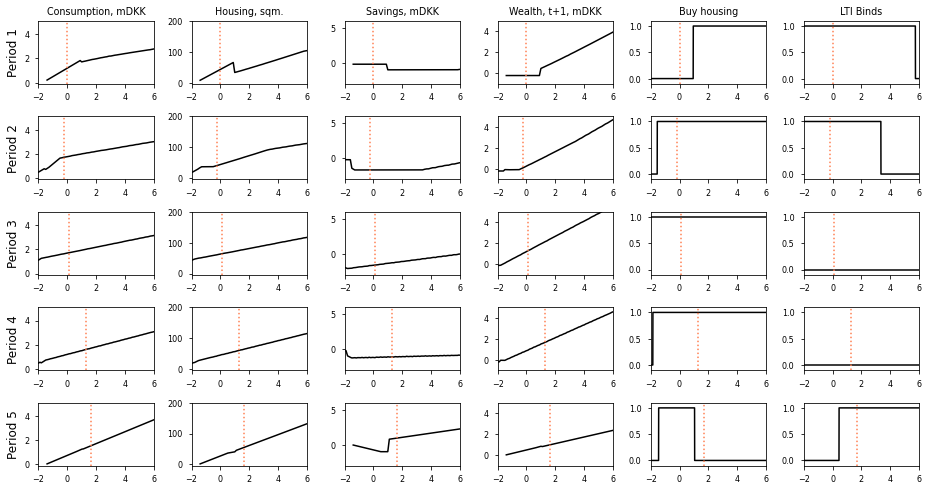

In [4]:
w0 = 0

paths = model.create_paths(w0,u,c,h,s,wplus,own,LTV,LTI)

output = [c,h,s,wplus,own,LTI]
labels = ["Consumption, mDKK","Housing, sqm.","Savings, mDKK","Wealth, t+1, mDKK","Buy housing","LTI Binds"]

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

x = np.linspace(-2,6,1000)
fig1 = plt.figure(figsize=(13,8))
plt.style.use(['default', 'seaborn-paper'])
plt.tight_layout()
for i in range(0,5):
    for j,e in enumerate(output):
        y = e[i](x)
        ax = fig1.add_subplot(6,6,i*6+j+1)
        ax.plot(x,y,c='black',linewidth=1.5)
        ax.axvline(paths.wealth_path[i],c='coral',linestyle=":",linewidth=1.5)
        
        if j == 0: ax.set(xlim=(-2, 6), ylim=(0-0.1, 5+0.1))
        if j == 1: ax.set(xlim=(-2, 6), ylim=(-4, 200))
        if j == 2: ax.set(xlim=(-2, 6), ylim=(-3, 6))            
        if j == 3: ax.set(xlim=(-2, 6), ylim=(-1, 5))
        if j == 4 or j == 5: ax.set(xlim=(-2, 6), ylim=(-0.1, 1.1))    
            
        if i == 0: ax.set_title(labels[j])
        if j == 0: ax.set_ylabel('Period '+str(i+1),fontsize=12)
plt.tight_layout()
#plt.savefig("Figure.pdf") # Uncomment to save
###########################################################################
# The gray line shows decision, given beginning-of-period wealth
# The red line shows the beginning-of-period wealth for each period
# I.e., wealth_t+1 and the red line intersect at next periods initial
# wealth, which allows to visualise the all decisions "through" the model
##########################################################################